In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [ ]:
(X_train, y_train), (X_test,y_test)  = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
classes[9]

'truck'

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

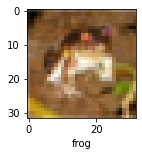

In [ ]:
plot_sample(X_train, y_train, 0)

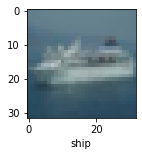

In [ ]:
plot_sample(X_train, y_train,1162)

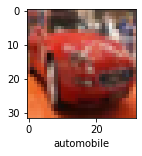

In [ ]:
plot_sample(X_train, y_train,5)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8067 - accuracy: 0.3588
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6235 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5408 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4826 - accuracy: 0.4757
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4304 - accuracy: 0.4945


You can see that at the end of 5 epochs, accuracy is at around 49%

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np 
y_pred = ann.predict(X_train)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Clasification Report: \n', classification_report)

Clasification Report: 
 <function classification_report at 0x7f781545eb00>


Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Flatten(),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(10, activation = 'softmax')

])

In [ ]:
from sklearn import metrics
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 17s 6ms/step - loss: 1.4972 - accuracy: 0.4646
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1424 - accuracy: 0.6006
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0149 - accuracy: 0.6481
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9326 - accuracy: 0.6751
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8684 - accuracy: 0.6977
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8203 - accuracy: 0.7136
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7740 - accuracy: 0.7311
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7416 - accuracy: 0.7411
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6999 - accuracy: 0.7558
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.9151 - accuracy: 0.6931


[0.9151231646537781, 0.6930999755859375]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.9987845e-04, 6.9781952e-04, 1.1593695e-02, 8.7257117e-01,
        8.6866465e-04, 6.4212888e-02, 4.8048543e-03, 1.3266070e-04,
        1.7586330e-02, 2.6632013e-02],
       [1.4474744e-04, 4.3361332e-02, 8.9753794e-06, 4.0719200e-07,
        4.6849101e-07, 1.1614133e-08, 2.2399758e-09, 3.6334964e-09,
        9.5624787e-01, 2.3620029e-04],
       [1.2937525e-01, 2.3182522e-01, 2.7328838e-02, 5.7845492e-02,
        2.1135356e-02, 4.2230338e-03, 1.1080218e-03, 7.9110023e-03,
        4.6903026e-01, 5.0217595e-02],
       [7.3344314e-01, 6.7100138e-03, 2.1085516e-01, 4.8317033e-04,
        9.0693207e-03, 9.3609106e-06, 1.0477670e-04, 1.5475582e-03,
        3.7656486e-02, 1.2098337e-04],
       [6.2747622e-06, 5.2504434e-04, 4.3315213e-02, 1.1061709e-01,
        3.4623721e-01, 2.0296941e-02, 4.7886419e-01, 8.3408686e-06,
        4.7497721e-05, 8.2154213e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

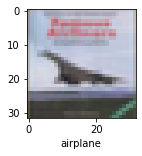

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[3]]

'airplane'